# Data Preparation

In [48]:
import numpy as np
import os

epoch_count = 50 # number of epochs used to train all models
base_data_path = "./coe379L-sp24/datasets/unit03/Project3/data_all_modified/"
damage_file_paths = os.listdir(base_data_path + "damage/")
no_damage_file_paths = os.listdir(base_data_path + "no_damage/")
print("damage file entry: ", damage_file_paths[0])
print("No damage file entry: ", no_damage_file_paths[0])
print()
print("Number of damage files: ", len(damage_file_paths))
print("Number of no_damage files: ", len(no_damage_file_paths))
print("Total number of files: ", len(damage_file_paths) + len(no_damage_file_paths))

damage file entry:  -95.613297_29.758008.jpeg
No damage file entry:  -96.93535899999999_28.727813.jpeg

Number of damage files:  14170
Number of no_damage files:  7152
Total number of files:  21322


First we seek preliminary information about our dataset such as the size of each file, the number of files in each class, and more.

In [74]:
# updating file paths for each image belonging to both classes
damage_file_paths = [base_data_path + "damage/" + file for file in os.listdir(base_data_path + "damage/")]
no_damage_file_paths = [base_data_path + "no_damage/" + file for file in os.listdir(base_data_path + "no_damage/")]
print(f"damage file entry 1: , '{damage_file_paths[0]}'")
print(f"No damage file entry 1: , '{no_damage_file_paths[0]}'")

damage file entry 1: , './coe379L-sp24/datasets/unit03/Project3/data_all_modified/damage/-95.613297_29.758008.jpeg'
No damage file entry 1: , './coe379L-sp24/datasets/unit03/Project3/data_all_modified/no_damage/-96.93535899999999_28.727813.jpeg'


In [42]:
# calculating file size statistics
print(f"{'='*20} File Size Statistics {'='*20}")
damage_file_sizes = np.array([os.path.getsize(file) for file in damage_file_paths])
no_damage_file_sizes = np.array([os.path.getsize(file) for file in no_damage_file_paths])
print(f"Average damage file size : {np.mean(damage_file_sizes)/1000:0.4f}kB")
print(f"Average no_damage file size: {np.mean(no_damage_file_sizes)/1000:0.4f}kB")
print(f"Range of damage file sizes : {np.min(damage_file_sizes)/1000:0.4f}kB - {np.max(damage_file_sizes)/1000:0.4f}kB")
print(f"Range of no_damage file sizes: {np.min(no_damage_file_sizes)/1000:0.4f}kB - {np.max(no_damage_file_sizes)/1000:0.4f}kB")
print(f"Standard deviation of damage file sizes : {np.std(damage_file_sizes)/1000:0.4f}kB")
print(f"Standard deviation of no_damage file sizes: {np.std(no_damage_file_sizes)/1000:0.4f}kB")

==================== File Size Statistics ====================
Average damage file size : 2.5123kB
Average no_damage file size: 3.0134kB
Range of damage file sizes : 0.9430kB - 5.6470kB
Range of no_damage file sizes: 1.0200kB - 5.1340kB
Standard deviation of damage file sizes : 0.4026kB
Standard deviation of no_damage file sizes: 0.4114kB


In [43]:
print(f"{'='*20} File Dimension Statistics {'='*20}")
from skimage import io
# calculating file dimension statistics
damage_file_dims = [io.imread(file).shape for file in damage_file_paths]
no_damage_file_dims = [io.imread(file).shape for file in no_damage_file_paths]
print(f"Average damage file dimensions : {np.mean(damage_file_dims, axis=0)[:2]}")
print(f"Average no_damage file dimensions: {np.mean(no_damage_file_dims, axis=0)[:2]}")
print(f"Range of damage file dimensions : {np.min(damage_file_dims, axis=0)[:2]} - {np.max(damage_file_dims, axis=0)[:2]}")
print(f"Range of no_damage file dimensions: {np.min(no_damage_file_dims, axis=0)[:2]} - {np.max(no_damage_file_dims, axis=0)[:2]}")

==================== File Dimension Statistics ====================
Average damage file dimensions : [128. 128.]
Average no_damage file dimensions: [128. 128.]
Range of damage file dimensions : [128 128] - [128 128]
Range of no_damage file dimensions: [128 128] - [128 128]


We can see that the statistical measures for both image classes are mostly similar. Furthermore, the dimensions for all the images appear to be 128x128 pixels.

#### Now lets visualize the data to get a better understanding of the dataset.

========== DAMAGE ==========


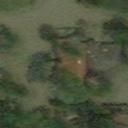

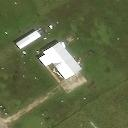


========== NO_DAMAGE ==========


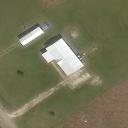

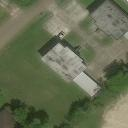

In [5]:
from IPython.display import display, Image

# visualizing fist 5 images from damage class
print(f'{"="*10} DAMAGE {"="*10}')
for i in range(2):
    display(Image(filename=damage_file_paths[i]))

print()
print(f'{"="*10} NO_DAMAGE {"="*10}')
# visualizing fist 5 images from no_damage class
for i in range(2):
    display(Image(filename=no_damage_file_paths[i]))  

### Image Pre-Proccessing
Because we will explore both ANN and CNN architectures, we will need to pre-process the images differently. For the ANN, we will flatten the images into a single vector. For the CNN, we will keep the images as 2D arrays using helper functions from libraries such as keras. First we will pre-process the images for our ANN model. 

In [6]:
from skimage import io

# flattening + normalizing all images
X_file_paths = damage_file_paths + no_damage_file_paths
X = np.array([io.imread(file).flatten()/255.0 for file in X_file_paths])
y = np.array([1 for _ in range(len(damage_file_paths))] + [0 for _ in range(len(no_damage_file_paths))])

from sklearn.model_selection import train_test_split

# splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)
X_train, X_test = np.array(X_train), np.array(X_test) # converting to numpy arrays


# one-hot encoding the target variable y_train using keras to_categorical method
from tensorflow.keras.utils import to_categorical

num_classes = 2
y_train_categorical = to_categorical(y_train, num_classes=num_classes)
y_test_categorical = to_categorical(y_test, num_classes=num_classes)

print(y_train_categorical[:5])
print("1st column represents no_damage class and 2nd column represents damage class")

2024-04-08 23:19:28.629965: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-08 23:19:28.686332: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-08 23:19:28.686377: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-08 23:19:28.689117: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-08 23:19:28.700020: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-08 23:19:28.701290: I tensorflow/core/platform/cpu_feature_guard.cc:1

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]
1st column represents no_damage class and 2nd column represents damage class


#### Now that we have processed the images for our ANN architecture, we can re-format our dataset for our CNN architectures. 

### Load & Split (CNN)

### Next, we can prepare the data set and split into test and train

In [7]:
# clear directories before proceeding
import shutil
try:
    shutil.rmtree("hurricane/train")
    shutil.rmtree("hurricane/test")
except:
    pass

In [8]:
# two classes: damage and no-damage
# create directories for each class within train and test directory

from pathlib import Path

Path("hurricane/train/damage").mkdir(parents=True, exist_ok=True)
Path("hurricane/test/no-damage").mkdir(parents=True, exist_ok=True)

Path("hurricane/test/damage").mkdir(parents=True, exist_ok=True)
Path("hurricane/train/no-damage").mkdir(parents=True, exist_ok=True)

In [9]:
# updating path for each class's data set
damage_file_paths = os.listdir("./coe379L-sp24/datasets/unit03/Project3/data_all_modified/damage")
no_damage_file_paths = os.listdir("./coe379L-sp24/datasets/unit03/Project3/data_all_modified/no_damage")

In [44]:
# split image paths to train and test; 80% in train, 20% in test
import random

print(f'{"="*10} DAMAGE {"="*10}')
train_damage_paths = random.sample(damage_file_paths, int(len(damage_file_paths)*0.8))
print("Train data set image count: ", len(train_damage_paths))
test_damage_paths = [ p for p in damage_file_paths if p not in train_damage_paths]
print("Test data set image count: ", len(test_damage_paths))

overlap = [p for p in train_damage_paths if p in test_damage_paths]
print("Overlap between train and test sets: ", len(overlap))

print(f'\n{"="*10} NO_DAMAGE {"="*10}')
train_no_damage_paths = random.sample(no_damage_file_paths, int(len(no_damage_file_paths)*0.8))
print("Train data set image count: ", len(train_no_damage_paths))
test_no_damage_paths = [ p for p in no_damage_file_paths if p not in train_no_damage_paths]
print("Test data set image count: ", len(test_damage_paths))

overlap = [p for p in train_no_damage_paths if p in test_no_damage_paths]
print("Overlap between train and test sets: ", len(overlap))

========== DAMAGE ==========
Train data set image count:  11336
Test data set image count:  2834
Overlap between train and test sets:  0

========== NO_DAMAGE ==========
Train data set image count:  5721
Test data set image count:  2834
Overlap between train and test sets:  0


In [11]:
# copy files into respective train and test directories
for p in train_damage_paths:
    shutil.copyfile(os.path.join(base_data_path + "damage", p), os.path.join("hurricane/train/damage", p))

for p in test_damage_paths:
    shutil.copyfile(os.path.join(base_data_path + "damage", p), os.path.join("hurricane/test/damage", p))

print(f'{"="*10} DAMAGE {"="*10}')
print("Files in train/damage: ", len(os.listdir("hurricane/train/damage")))
print("Files in test/damage: ", len(os.listdir("hurricane/test/damage")))


for p in train_no_damage_paths:
    print(os.path.join(base_data_path + "no_damage", p))
    shutil.copyfile(os.path.join(base_data_path + "no_damage", p), os.path.join("hurricane/train/no-damage", p))

for p in test_no_damage_paths:
    shutil.copyfile(os.path.join(base_data_path + "no_damage", p), os.path.join("hurricane/test/no-damage", p))

print(f'\n{"="*10} NO_DAMAGE {"="*10}')
print("Files in train/no-damage: ", len(os.listdir("hurricane/train/no-damage")))
print("Files in test/no-damage: ", len(os.listdir("hurricane/test/no-damage")))

========== DAMAGE ==========
Files in train/damage:  11336
Files in test/damage:  2834
./coe379L-sp24/datasets/unit03/Project3/data_all_modified/no_damage/-95.62702900000001_29.770607000000002.jpeg
./coe379L-sp24/datasets/unit03/Project3/data_all_modified/no_damage/-96.935312_28.728865000000003.jpeg
./coe379L-sp24/datasets/unit03/Project3/data_all_modified/no_damage/-96.988475_28.775219.jpeg
./coe379L-sp24/datasets/unit03/Project3/data_all_modified/no_damage/-95.079088_30.030043.jpeg
./coe379L-sp24/datasets/unit03/Project3/data_all_modified/no_damage/-95.625699_29.866532.jpeg
./coe379L-sp24/datasets/unit03/Project3/data_all_modified/no_damage/-95.641692_29.771469.jpeg
./coe379L-sp24/datasets/unit03/Project3/data_all_modified/no_damage/-95.283424_29.610117.jpeg
./coe379L-sp24/datasets/unit03/Project3/data_all_modified/no_damage/-95.07839799999999_29.797837.jpeg
./coe379L-sp24/datasets/unit03/Project3/data_all_modified/no_damage/-95.268261_29.605176.jpeg
./coe379L-sp24/datasets/unit03/Pr

### Image Processing (CNN)
Next, we will process the image data for our CNN architectures. We will use the keras library to help us with this task.

In [45]:
# todo: deploy model + write report + write readme
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.layers.experimental.preprocessing import Rescaling


image_shape = damage_file_dims[0][:2]

# training data processing
batch_size = 32
train_data_dir = "hurricane/train"

# note that subset="training", "validation", "both", and dictates which dataset is returned
train_ds, val_ds = tf.keras.utils.image_dataset_from_directory(
train_data_dir,
validation_split=0.2,
subset="both",
color_mode="rgb",
seed=123,
image_size=image_shape,
batch_size=batch_size)

rescale = Rescaling(scale=1.0/255)
train_rescale_ds = train_ds.map(lambda image,label:(rescale(image),label))
val_rescale_ds = val_ds.map(lambda image,label:(rescale(image),label))

# test data processing
test_data_dir = "hurricane/test"

# note that subset="training", "validation", "both", and dictates what is returned
test_ds = tf.keras.utils.image_dataset_from_directory(
test_data_dir,
seed=123,
color_mode="rgb",
image_size=image_shape)

# approach 1: manually rescale data --
rescale = Rescaling(scale=1.0/255)
test_rescale_ds = test_ds.map(lambda image,label:(rescale(image),label))

Found 17057 files belonging to 2 classes.
Using 13646 files for training.
Using 3411 files for validation.
Found 4265 files belonging to 2 classes.


# Model Development

#### ANN Model

In [13]:
# paper: https://openreview.net/pdf/1WvovwjA7UMnPB1oinBL.pdf
# Importing libraries needed for creating neural network
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import visualkeras

image_size= np.prod(damage_file_dims[0]) # takes the product of the all dimensions of the image
out_put_size = 2
num_zlin_pairs = 2
# create model. 
model_ann = Sequential()

# input layer (zero biased ReLU)
model_ann.add(Dense(784, activation='relu',input_shape=(image_size,), use_bias=False))

for i in range(num_zlin_pairs):
    # creates a zero-biased-linear pair of layers
    model_ann.add(Dense(256, activation='relu', use_bias=False))
    model_ann.add(Dense(128, activation='linear', use_bias=True))

# final (zero biased ReLU) layer
model_ann.add(Dense(256, activation='relu', use_bias=False))

# Softmax activation function is selected for multiclass classification
model_ann.add(Dense(out_put_size, activation='softmax'))

# Compile model
model_ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary
model_ann.summary()

# Visualization
visualkeras.layered_view(model_ann).show()

# Fitting
model_ann.fit(X_train, y_train_categorical, validation_split=0.2, epochs=epoch_count, batch_size=64, verbose=2)

# Saving model
model_ann.save('pranjal-coe-379l/project3/models/hurricane_ann_model.keras')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 784)               38535168  
                                                                 
 dense_1 (Dense)             (None, 256)               200704    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 256)               32768     
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 256)               32768     
                                                                 
 dense_6 (Dense)             (None, 2)                 5

2024-04-08 23:19:40.042269: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 2682716160 exceeds 10% of free system memory.


214/214 - 79s - loss: 1.2858 - accuracy: 0.6127 - val_loss: 0.5929 - val_accuracy: 0.6940 - 79s/epoch - 370ms/step
Epoch 2/10
214/214 - 72s - loss: 0.5879 - accuracy: 0.7042 - val_loss: 0.6150 - val_accuracy: 0.6981 - 72s/epoch - 336ms/step
Epoch 3/10
214/214 - 74s - loss: 0.5797 - accuracy: 0.7190 - val_loss: 0.5909 - val_accuracy: 0.6949 - 74s/epoch - 347ms/step
Epoch 4/10
214/214 - 72s - loss: 0.5565 - accuracy: 0.7328 - val_loss: 0.5596 - val_accuracy: 0.7374 - 72s/epoch - 337ms/step
Epoch 5/10
214/214 - 70s - loss: 0.5433 - accuracy: 0.7408 - val_loss: 0.5518 - val_accuracy: 0.7318 - 70s/epoch - 326ms/step
Epoch 6/10
214/214 - 75s - loss: 0.5364 - accuracy: 0.7459 - val_loss: 0.5402 - val_accuracy: 0.7556 - 75s/epoch - 349ms/step
Epoch 7/10
214/214 - 75s - loss: 0.5200 - accuracy: 0.7556 - val_loss: 0.6478 - val_accuracy: 0.6671 - 75s/epoch - 350ms/step
Epoch 8/10
214/214 - 71s - loss: 0.5223 - accuracy: 0.7570 - val_loss: 0.5364 - val_accuracy: 0.7515 - 71s/epoch - 332ms/step
Epo

In [23]:
test_loss, test_accuracy = model_ann.evaluate(X_test, y_test_categorical, verbose=0)
print("ANN Model accuracy:", test_accuracy)

ANN Model accuracy: 0.7720984816551208


#### Lennet-5 CNN Model

In [16]:
from keras import layers, models, optimizers

model_lenet5 = models.Sequential()

# Layer 1: Convolutional layer with 6 filters of size 3x3, followed by average pooling
model_lenet5.add(layers.Conv2D(6, kernel_size=(3, 3), activation='relu', input_shape=(no_damage_file_dims[0])))
model_lenet5.add(layers.AveragePooling2D(pool_size=(2, 2)))

# Layer 2: Convolutional layer with 16 filters of size 3x3, followed by average pooling
model_lenet5.add(layers.Conv2D(16, kernel_size=(3, 3), activation='relu'))
model_lenet5.add(layers.AveragePooling2D(pool_size=(2, 2)))

# Flatten the feature maps to feed into fully connected layers
model_lenet5.add(layers.Flatten())

# Layer 3: Fully connected layer with 120 neurons
model_lenet5.add(layers.Dense(120, activation='relu'))

# Layer 4: Fully connected layer with 84 neurons
model_lenet5.add(layers.Dense(84, activation='relu'))

# Output layer: Fully connected layer with num_classes neurons (e.g., 3 )
model_lenet5.add(layers.Dense(3, activation='softmax'))

# Compile model
model_lenet5.compile(optimizer=optimizers.RMSprop(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary
model_lenet5.summary()

# Visualization
visualkeras.layered_view(model_lenet5).show()

# Fit model
model_lenet5.fit(train_rescale_ds, validation_data=val_rescale_ds, epochs=epoch_count, batch_size=64)

# saving model
model_lenet5.save('pranjal-coe-379l/project3/models/hurricane_lenet5_model.keras')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 6)       168       
                                                                 
 average_pooling2d (Average  (None, 63, 63, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 16)        880       
                                                                 
 average_pooling2d_1 (Avera  (None, 30, 30, 16)        0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 14400)             0         
                                                                 
 dense_7 (Dense)             (None, 120)              

In [24]:
test_loss, test_accuracy = model_lenet5.evaluate(test_rescale_ds, verbose=0)
print("Lenet-5 CNN Model accuracy:", test_accuracy)

Lenet-5 CNN Model accuracy: 0.8363423347473145


#### Alternate Lennet-5 CNN Model

In [49]:
model_lenet5a = models.Sequential()

# Layer 1: Convolutional layer with 32 filters of size 3x3, followed by max pooling
model_lenet5a.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(no_damage_file_dims[0])))
model_lenet5a.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Layer 2: Convolutional layer with 64 filters of size 3x3, followed by max pooling
model_lenet5a.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_lenet5a.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Layer 3: Convolutional layer with 128 filters of size 3x3, followed by max pooling
model_lenet5a.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model_lenet5a.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Layer 4: Convolutional layer with 128 filters of size 3x3, followed by max pooling
model_lenet5a.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model_lenet5a.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Flatten the feature maps to feed into fully connected layers
model_lenet5a.add(layers.Flatten())

# Adding dropout layer with a dropout rate of 0.5 to reduce overfitting
model_lenet5a.add(layers.Dropout(0.5))

# Layer 5: Fully connected layer with 512 neurons
model_lenet5a.add(layers.Dense(512, activation='relu'))

# Output layer
model_lenet5a.add(layers.Dense(num_classes, activation='softmax'))

# Compile model
model_lenet5a.compile(optimizer=optimizers.RMSprop(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary
model_lenet5a.summary()

# Visualization
visualkeras.layered_view(model_lenet5a).show()

# Fit model
model_lenet5a.fit(train_rescale_ds, validation_data=val_rescale_ds, epochs=epoch_count, batch_size=64)

# Saving model
model_lenet5a.save('pranjal-coe-379l/project3/models/hurricane_lenet5a_model.keras')

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 63, 63, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 30, 30, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 14, 14, 128)      

In [58]:
test_loss, test_accuracy = model_lenet5a.evaluate(test_rescale_ds, verbose=0)
print("Alternate Lenet-5 CNN accuracy:", test_accuracy)

Alternate Lenet-5 CNN accuracy: 0.9835873246192932
